# LIMPEZA E TRATAMENTO DE DADOS

#### - 80% do tempo do cientista de dados é utilizado limpando e tratando dados.

#### - Por que dados tem problemas?
  * Sistemas de operações e bancos de dados sem restrições de entrada.
  * Atualizações diretas em bancos de dados.
  * Sistemas antigos, codificações diferentes.
  * Inconsistência nos processos de carga:
    - Origem da informação é diversa, não padronizada.
    - Mudanças no processo.
    - Erros no processo.

#### - Problemas geralmente encontrados:
  * Duplicidade
  * Consistência
  * Completude
  * Conformidade
  * Integridade

#### - Operação x Analítico:
  * Na operação o dado em seu formato individual não pode ser alterado para um valor padrão.
    - Ex.: Cliente do plano de saúde tem dado faltante. Não podemos preencher com a mediana, pois isso influencia o valor do plano.
  * No analítico, o dado não tem valor original, mas coletivo. Ele pode ser corrigido pelo "bem" do modelo.
    - Ex.: Modelo para prever custo dos clientes para o plano de saúde. Mas o algoritmo não suporta dados faltantes. Logo, pode-se alterar uma idade faltante para a mediana, pois não vai afetar a operação e não vai causar enviesamento no modelo.

In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import statistics as sts

In [3]:
# Importar dados
dataset = pd.read_csv('Dados/Churn.csv', sep=';')
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
# Tamanho
dataset.shape

(999, 12)

In [11]:
# Primeiro problema é dar nomes as colunas
dataset.columns = ["ID","Score","Estado","Gênero","Idade","Patrimônio","Saldo","Produtos","TemCardCredito","Ativo","Salário","Saiu"]

In [12]:
dataset.head()

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCardCredito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [14]:
# Explorar dados categóricos
# Estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot:xlabel='Estado'>

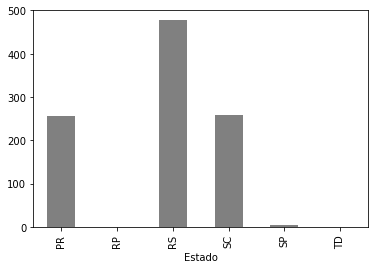

In [15]:
agrupado.plot.bar(color = 'gray')

In [16]:
# Gênero
agrupado = dataset.groupby(['Gênero']).size()
agrupado

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<AxesSubplot:xlabel='Gênero'>

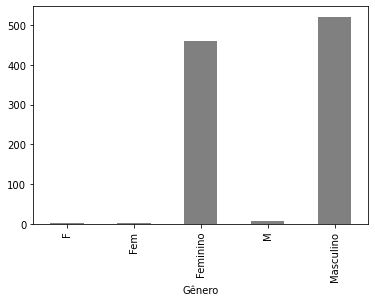

In [17]:
agrupado.plot.bar(color = 'gray')

In [18]:
# Explorar colunas númericas
# score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

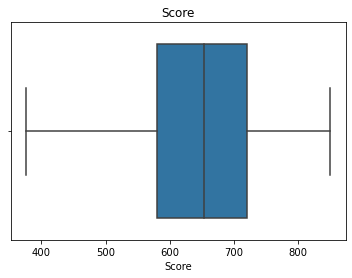

In [19]:
sns.boxplot(dataset['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

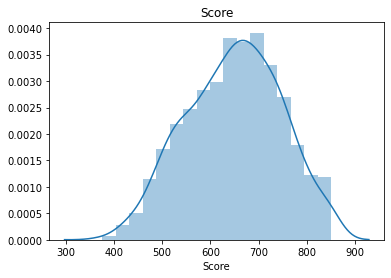

In [20]:
sns.distplot(dataset['Score']).set_title('Score')

In [21]:
# Idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

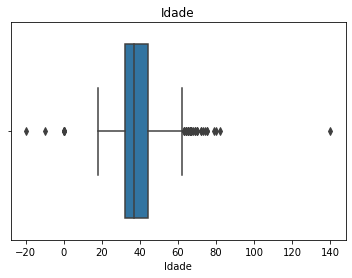

In [22]:
sns.boxplot(dataset['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Score')

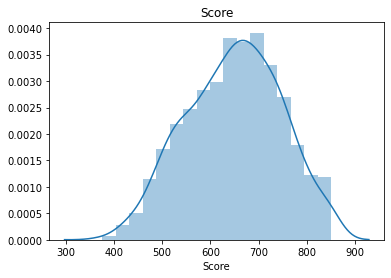

In [25]:
sns.distplot(dataset['Score']).set_title('Score')

In [23]:
# Saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

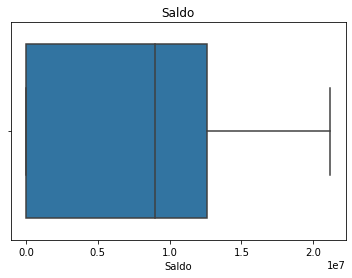

In [26]:
sns.boxplot(dataset['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

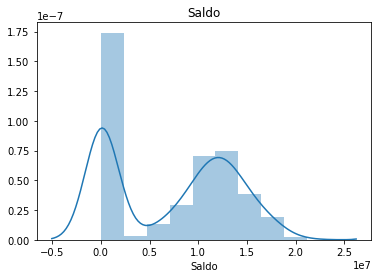

In [28]:
sns.distplot(dataset['Saldo']).set_title('Saldo')

In [29]:
# Salário
dataset['Salário'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário, dtype: float64

Text(0.5, 1.0, 'Salário')

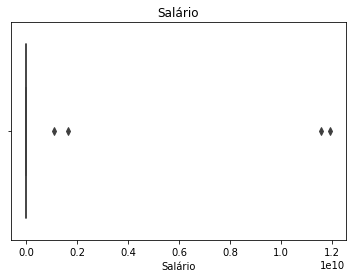

In [30]:
sns.boxplot(dataset['Salário']).set_title('Salário')

Text(0.5, 1.0, 'Salário')

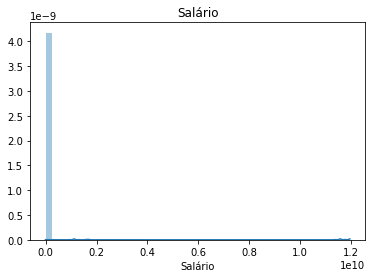

In [31]:
sns.distplot(dataset['Salário']).set_title('Salário')

In [32]:
# Contamos valores NAs
# Gênero e salário
dataset.isnull().sum()

ID                0
Score             0
Estado            0
Gênero            8
Idade             0
Patrimônio        0
Saldo             0
Produtos          0
TemCardCredito    0
Ativo             0
Salário           7
Saiu              0
dtype: int64

In [34]:
# Salário
# Remover NAs e substituir pela mediana
dataset['Salário'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário, dtype: float64

In [35]:
mediana = sts.median(dataset['Salário'])
mediana

70518.0

In [36]:
# Substituir NAs por mediana
dataset['Salário'].fillna(mediana, inplace = True)

In [37]:
# Verificar se NAs não existem mais
dataset['Salário'].isnull().sum()

0

In [40]:
# Gênero
# Falta de padronização e NAs
agrupado = dataset.groupby(["Gênero"]).size()
agrupado

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [43]:
# Total de NAs
dataset['Gênero'].isnull().sum()

8

In [44]:
# Padroniza de acordo com o domínio
dataset.loc[dataset['Gênero'] == 'M', 'Gênero'] = 'Masculino'
dataset.loc[dataset['Gênero'].isin(['Fem','F']), 'Gênero'] = 'Feminino'
# Visualiza o resultado
agrupado = dataset.groupby(['Gênero']).size()
agrupado

Gênero
Feminino     464
Masculino    527
dtype: int64

In [45]:
# Idades fora do domínio
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [47]:
# Visualizar
dataset.loc[(dataset['Idade']<0) | (dataset['Idade']>120)]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCardCredito,Ativo,Salário,Saiu
867,869,636,RS,Feminino,70518,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,70518,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,70518,5,93147,2,1,0,6621413.0,0


In [48]:
# Calcular a mediana
mediana = sts.median(dataset['Idade'])
mediana

37

In [49]:
# Substituir pela mediana
dataset.loc[(dataset['Idade']<0) | (dataset['Idade']>120), 'Idade'] = mediana

In [50]:
# Verificamos se ainda existem idades fora do domínio
dataset.loc[(dataset['Idade']<0) | (dataset['Idade']>120)]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCardCredito,Ativo,Salário,Saiu


In [52]:
# Dados duplicados, buscamos pelo ID
dataset[dataset.duplicated(['ID'], keep=False)]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCardCredito,Ativo,Salário,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [53]:
# Excluindo pelo ID
dataset.drop_duplicates(subset='ID', keep='first', inplace=True)
# Buscamos duplicadas
dataset[dataset.duplicated(['ID'], keep=False)]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCardCredito,Ativo,Salário,Saiu


In [54]:
# Estado fora do domínio
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [58]:
# Atribuições RS (moda)
dataset.loc[dataset['Estado'].isin(['RP','SP','TD']), 'Estado'] = 'RS'
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [59]:
# Outliers em salário, vamos considerar 2 desvios padrão
desv = sts.stdev(dataset['Salário'])
desv

528988918.4679201

In [60]:
# Definir padrão como maior que 2 desvios padrão
# Checamos se algum atende ao critério
dataset.loc[dataset['Salário'] > 2 * desv]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCardCredito,Ativo,Salário,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [61]:
# Vamos atualizar salário para mediana, calculamos
mediana = sts.median(dataset['Salário'])
mediana

8637195.5

In [62]:
# Atribuimos
dataset.loc[dataset['Salário'] >= 2 * desv, 'Salário'] = mediana
# Checamos se algum atende ao critério
dataset.loc[dataset['Salário'] >= 2 * desv]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCardCredito,Ativo,Salário,Saiu


In [63]:
dataset.head()

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCardCredito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [64]:
dataset.shape

(998, 12)